In [49]:
import cmath
from iminuit.cost import LeastSquares
from iminuit import cost
from iminuit import Minuit
import numpy as np
from matplotlib import pyplot as plt


f = open('gap1.txt', "r")
lines = f.readlines()
freq = []
I = []
Q = []
for x in lines:
    freq.append(float(x.split(',')[0]))
    I.append(float(x.split(',')[1]))
    Q.append(float(x.split(',')[2]))

f.close()



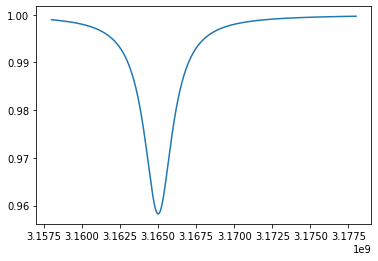

In [100]:
fmin = 50
par = [1, 1e3, 6e4, -0.5, 0, -1e-9, -1e-19, 0]

def s21_module(x, a, b, c, d, e, f, g, h):
    return abs(f*x + g*x**2 + h*x**3 + a*(1-b*(b**(-1) - (c)**(-1))/(1 + 2j*b*(x - e)/e)))
    #abs(f*x + g*x**2 + h*x**3 + a*(1-cmath.exp(1j*d*b*(b**(-1) - (c)**(-1))/(1 + 2j*b*(x - e)/fmin))))

x=np.linspace(3.158000E+9,3.178000E+9,1601)
#x = np.linspace(-3.14, 100, 1601)

def s21(x, p1, p2, p3, p4, p5):
    return abs((1 - p2*(p2**(-1) - (p3)**(-1)) / (1 + 2j * p2 * ( x - p5 ) / p5 )))

#def s21_module(x):
#    return abs()

yvalues = np.zeros(len(freq))
for i in range(0,len(freq)):
    #yvalues[i] = abs(1j*math.cos(x[i]))
    yvalues[i] = s21(x[i], 1, 1400, 1461, -0.5, 3.165*10**9)
    #yvalues[i] = np.sqrt(I[i]**2+Q[i]**2)



phases = np.zeros(len(freq))
for i in range(0, len(freq)):
    phases[i] = math.atan(Q[i]/I[i])

plt.plot(x, yvalues)
#x = np.arange(5.79*10**9, , 0.1)


Ora proviamo a fittare qualcosa

In [65]:
least_squares = LeastSquares(freq, yvalues, 0.1, s21_module)
m = Minuit(least_squares, a = 1, b= 1e3, c= 6e4, d = -0.5, e=0, f = -1e-9, g = -1e-19, h = 0)  #starting values for our 8 parameters

print(m.values)
plt.plot(freq, s21_module(freq, *m.values), label="fit")

<ValueView a=1.0 b=1000.0 c=60000.0 d=-0.5 e=0.0 f=-1e-09 g=-1e-19 h=0.0>


TypeError: can't multiply sequence by non-int of type 'float'